In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MountainCarEnv import MountainCarEnv
import pickle
from os import path

def discrete_state(state, env, discrete_os_win_size):
    ds = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(ds.astype(int))

def train_Q_car(env, lr, gamma, num_episodes, display_interval, discrete_size, eps, q_table, iteration):
    discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / discrete_size

    # Exploration settings
    start_eps_decay = 1
    end_eps_decay = num_episodes // 2
    eps_decay_val = eps / (end_eps_decay - start_eps_decay)

    rewards = []
    avg_rewards = []

    for ep in range(num_episodes):
        ds = discrete_state(env.reset(), env, discrete_os_win_size)
        finished = False
        ep_rewards = 0

        while not finished:
            if np.random.random() > eps:
                act = np.argmax(q_table[ds])
            else:
                act = np.random.randint(0, env.action_space.n)

            next_state, rew, finished, _ = env.step(act)
            ep_rewards += rew
            next_ds = discrete_state(next_state, env, discrete_os_win_size)

            if not finished:
                max_next_q = np.max(q_table[next_ds])
                current_q = q_table[ds + (act,)]
                updated_q = (1 - lr) * current_q + lr * (rew + gamma * max_next_q)
                q_table[ds + (act,)] = updated_q
            elif next_state[0] >= env.goal_position:
                q_table[ds + (act,)] = 0

            ds = next_ds

        rewards.append(ep_rewards)

        if end_eps_decay >= ep >= start_eps_decay:
            eps -= eps_decay_val

        if ep % display_interval == 0:
            avg_reward = np.mean(rewards[-display_interval:])
            avg_rewards.append(avg_reward)
            print(f"Episode: {ep}, Average Reward: {avg_reward}")

    env.close()
    with(open('mountain_car_q_learn_iteration_{}.pkl'.format(iteration), 'wb')) as q_file:
        pickle.dump(q_table, q_file)
    return avg_rewards, q_table

In [2]:
def test_q_learning_agent(env, q_table, test_episodes):
    def discrete_state(state, discrete_os_win_size):
        ds = (state - env.observation_space.low) / discrete_os_win_size
        return tuple(ds.astype(int))
    rewards = []
    for episode in range(test_episodes):
        discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / discrete_size
        ds = discrete_state(env.reset(), discrete_os_win_size)
        finished = False
        step = 0

        print(f"Test Episode {episode + 1}")

        while not finished:
            action = np.argmax(q_table[ds])
            next_state, _, finished, _ = env.step(action)
            next_ds = discrete_state(next_state, discrete_os_win_size)
            env.render()
            ds = next_ds
            step += 1

        print(f"Episode {episode + 1} finished in {step} steps")
        rewards.append(step)
    env.close()
    return rewards

Episode: 0, Average Reward: -500.0
Episode: 1000, Average Reward: -499.725
Episode: 2000, Average Reward: -464.871
Episode: 3000, Average Reward: -349.581
Episode: 4000, Average Reward: -253.487
Episode: 5000, Average Reward: -185.403
Episode: 6000, Average Reward: -160.427
Episode: 7000, Average Reward: -148.747
Episode: 8000, Average Reward: -159.898
Episode: 9000, Average Reward: -146.7


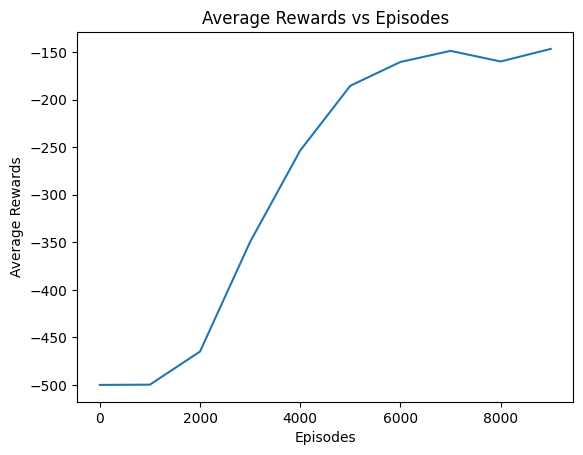

In [3]:
# Iteration 1

env = MountainCarEnv(render_mode="rgb_array")
lr = 0.1
gamma = 0.95
num_episodes = 10000
display_interval = 1000
discrete_size = [20, 20]

# Exploration settings
eps = 1
start_eps_decay = 1
end_eps_decay = num_episodes // 2
eps_decay_val = eps / (end_eps_decay - start_eps_decay)

q_table = np.random.uniform(low=-2, high=0, size=(discrete_size + [env.action_space.n]))

rewards, new_q_table = train_Q_car(env=env, lr=lr, gamma=gamma, num_episodes=num_episodes, display_interval=display_interval, discrete_size=discrete_size, eps=eps, q_table=q_table, iteration=1)

plt.plot(np.arange(0, num_episodes, display_interval), rewards)
plt.xlabel("Episodes")
plt.ylabel("Average Rewards")
plt.title("Average Rewards vs Episodes")
plt.show()

In [4]:
env = MountainCarEnv(render_mode="human")
test_episodes = 5
rewards = test_q_learning_agent(env, q_table, test_episodes)
print(f"Average steps per episode: {np.mean(rewards)}")

Test Episode 1
Episode 1 finished in 172 steps
Test Episode 2
Episode 2 finished in 148 steps
Test Episode 3
Episode 3 finished in 172 steps
Test Episode 4
Episode 4 finished in 127 steps
Test Episode 5
Episode 5 finished in 130 steps
Average steps per episode: 149.8


Episode: 0, Average Reward: -500.0
Episode: 1000, Average Reward: -500.0
Episode: 2000, Average Reward: -486.401
Episode: 3000, Average Reward: -422.845
Episode: 4000, Average Reward: -288.324
Episode: 5000, Average Reward: -225.163
Episode: 6000, Average Reward: -164.28
Episode: 7000, Average Reward: -148.481
Episode: 8000, Average Reward: -141.917
Episode: 9000, Average Reward: -141.439


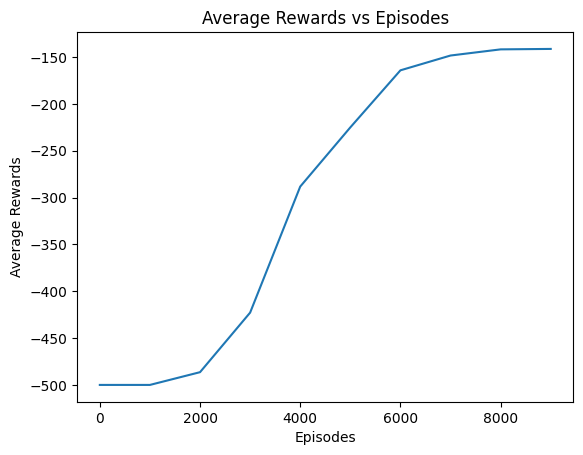

In [5]:
# Iteration 2

env = MountainCarEnv(render_mode="rgb_array")
lr = 0.2
gamma = 0.95
num_episodes = 10000
display_interval = 1000
discrete_size = [20, 20]

# Exploration settings
eps = 1
start_eps_decay = 1
end_eps_decay = num_episodes // 2
eps_decay_val = eps / (end_eps_decay - start_eps_decay)

q_table = np.random.uniform(low=-2, high=0, size=(discrete_size + [env.action_space.n]))

rewards, new_q_table = train_Q_car(env=env, lr=lr, gamma=gamma, num_episodes=num_episodes, display_interval=display_interval, discrete_size=discrete_size, eps=eps, q_table=q_table, iteration=2)

plt.plot(np.arange(0, num_episodes, display_interval), rewards)
plt.xlabel("Episodes")
plt.ylabel("Average Rewards")
plt.title("Average Rewards vs Episodes")
plt.show()

In [6]:
env = MountainCarEnv(render_mode="human")
test_episodes = 5
rewards = test_q_learning_agent(env, q_table, test_episodes)
print(f"Average steps per episode: {np.mean(rewards)}")

Test Episode 1
Episode 1 finished in 194 steps
Test Episode 2
Episode 2 finished in 157 steps
Test Episode 3
Episode 3 finished in 156 steps
Test Episode 4
Episode 4 finished in 131 steps
Test Episode 5
Episode 5 finished in 149 steps
Average steps per episode: 157.4


Episode: 0, Average Reward: -500.0
Episode: 1000, Average Reward: -499.799
Episode: 2000, Average Reward: -466.678
Episode: 3000, Average Reward: -349.612
Episode: 4000, Average Reward: -261.675
Episode: 5000, Average Reward: -214.258
Episode: 6000, Average Reward: -162.759
Episode: 7000, Average Reward: -163.431
Episode: 8000, Average Reward: -162.225
Episode: 9000, Average Reward: -156.986


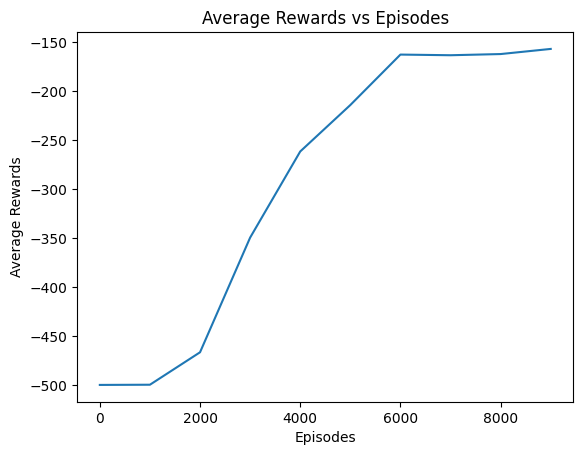

In [7]:
# Iteration 3

env = MountainCarEnv(render_mode="rgb_array")
lr = 0.1
gamma = 0.9
num_episodes = 10000
display_interval = 1000
discrete_size = [20, 20]

# Exploration settings
eps = 1
start_eps_decay = 1
end_eps_decay = num_episodes // 2
eps_decay_val = eps / (end_eps_decay - start_eps_decay)

q_table = np.random.uniform(low=-2, high=0, size=(discrete_size + [env.action_space.n]))

rewards, new_q_table = train_Q_car(env=env, lr=lr, gamma=gamma, num_episodes=num_episodes, display_interval=display_interval, discrete_size=discrete_size, eps=eps, q_table=q_table, iteration=3)

plt.plot(np.arange(0, num_episodes, display_interval), rewards)
plt.xlabel("Episodes")
plt.ylabel("Average Rewards")
plt.title("Average Rewards vs Episodes")
plt.show()

In [8]:
env = MountainCarEnv(render_mode="human")
test_episodes = 5
rewards = test_q_learning_agent(env, q_table, test_episodes)
print(f"Average steps per episode: {np.mean(rewards)}")

Test Episode 1
Episode 1 finished in 167 steps
Test Episode 2
Episode 2 finished in 116 steps
Test Episode 3
Episode 3 finished in 118 steps
Test Episode 4
Episode 4 finished in 162 steps
Test Episode 5
Episode 5 finished in 109 steps
Average steps per episode: 134.4


Episode: 0, Average Reward: -500.0
Episode: 1000, Average Reward: -467.874
Episode: 2000, Average Reward: -361.145
Episode: 3000, Average Reward: -276.152
Episode: 4000, Average Reward: -212.712
Episode: 5000, Average Reward: -188.24
Episode: 6000, Average Reward: -173.993
Episode: 7000, Average Reward: -157.762
Episode: 8000, Average Reward: -146.626
Episode: 9000, Average Reward: -157.174


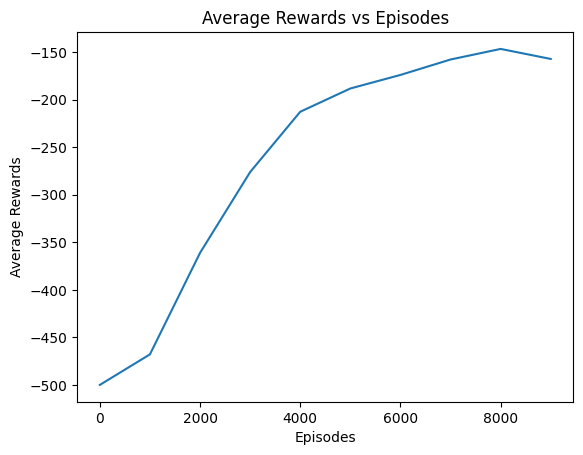

In [9]:
# Iteration 4

env = MountainCarEnv(render_mode="rgb_array")
lr = 0.1
gamma = 0.95
num_episodes = 10000
display_interval = 1000
discrete_size = [20, 20]

# Exploration settings
eps = 0.75
start_eps_decay = 1
end_eps_decay = num_episodes // 2
eps_decay_val = eps / (end_eps_decay - start_eps_decay)

q_table = np.random.uniform(low=-2, high=0, size=(discrete_size + [env.action_space.n]))

rewards, new_q_table = train_Q_car(env=env, lr=lr, gamma=gamma, num_episodes=num_episodes, display_interval=display_interval, discrete_size=discrete_size, eps=eps, q_table=q_table, iteration=4)

plt.plot(np.arange(0, num_episodes, display_interval), rewards)
plt.xlabel("Episodes")
plt.ylabel("Average Rewards")
plt.title("Average Rewards vs Episodes")
plt.show()

In [10]:
env = MountainCarEnv(render_mode="human")
test_episodes = 5
rewards = test_q_learning_agent(env, q_table, test_episodes)
print(f"Average steps per episode: {np.mean(rewards)}")

Test Episode 1
Episode 1 finished in 152 steps
Test Episode 2
Episode 2 finished in 153 steps
Test Episode 3
Episode 3 finished in 150 steps
Test Episode 4
Episode 4 finished in 149 steps
Test Episode 5
Episode 5 finished in 118 steps
Average steps per episode: 144.4


Episode: 0, Average Reward: -500.0
Episode: 1000, Average Reward: -500.0
Episode: 2000, Average Reward: -500.0
Episode: 3000, Average Reward: -499.686
Episode: 4000, Average Reward: -495.71
Episode: 5000, Average Reward: -485.146
Episode: 6000, Average Reward: -452.141
Episode: 7000, Average Reward: -405.994
Episode: 8000, Average Reward: -358.236
Episode: 9000, Average Reward: -318.749
Episode: 10000, Average Reward: -286.911
Episode: 11000, Average Reward: -254.418
Episode: 12000, Average Reward: -236.122
Episode: 13000, Average Reward: -220.525
Episode: 14000, Average Reward: -204.981
Episode: 15000, Average Reward: -191.398
Episode: 16000, Average Reward: -188.91
Episode: 17000, Average Reward: -181.258
Episode: 18000, Average Reward: -167.264
Episode: 19000, Average Reward: -145.844
Episode: 20000, Average Reward: -143.941
Episode: 21000, Average Reward: -155.331
Episode: 22000, Average Reward: -154.246
Episode: 23000, Average Reward: -159.244
Episode: 24000, Average Reward: -154.

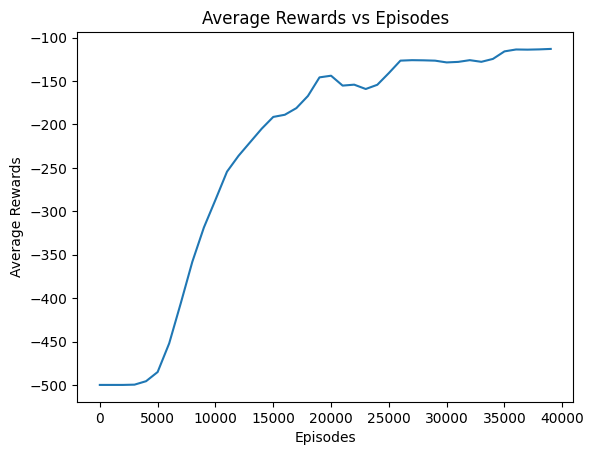

In [11]:
# Iteration 5

env = MountainCarEnv(render_mode="rgb_array")
lr = 0.1
gamma = 0.95
num_episodes = 40000
display_interval = 1000
discrete_size = [30, 30]

# Exploration settings
eps = 1
start_eps_decay = 1
end_eps_decay = num_episodes // 2
eps_decay_val = eps / (end_eps_decay - start_eps_decay)

q_table = np.random.uniform(low=-2, high=0, size=(discrete_size + [env.action_space.n]))

rewards, new_q_table = train_Q_car(env=env, lr=lr, gamma=gamma, num_episodes=num_episodes, display_interval=display_interval, discrete_size=discrete_size, eps=eps, q_table=q_table, iteration=5)

plt.plot(np.arange(0, num_episodes, display_interval), rewards)
plt.xlabel("Episodes")
plt.ylabel("Average Rewards")
plt.title("Average Rewards vs Episodes")
plt.show()

In [12]:
env = MountainCarEnv(render_mode="human")
test_episodes = 5
rewards = test_q_learning_agent(env, q_table, test_episodes)
print(f"Average steps per episode: {np.mean(rewards)}")

Test Episode 1
Episode 1 finished in 110 steps
Test Episode 2
Episode 2 finished in 115 steps
Test Episode 3
Episode 3 finished in 112 steps
Test Episode 4
Episode 4 finished in 110 steps
Test Episode 5
Episode 5 finished in 115 steps
Average steps per episode: 112.4


Episode: 0, Average Reward: -500.0
Episode: 1000, Average Reward: -496.777
Episode: 2000, Average Reward: -483.295
Episode: 3000, Average Reward: -462.799
Episode: 4000, Average Reward: -451.241
Episode: 5000, Average Reward: -415.075
Episode: 6000, Average Reward: -379.05
Episode: 7000, Average Reward: -351.904
Episode: 8000, Average Reward: -330.126
Episode: 9000, Average Reward: -299.757
Episode: 10000, Average Reward: -280.773
Episode: 11000, Average Reward: -249.807
Episode: 12000, Average Reward: -242.052
Episode: 13000, Average Reward: -223.758
Episode: 14000, Average Reward: -221.644
Episode: 15000, Average Reward: -202.433
Episode: 16000, Average Reward: -201.133
Episode: 17000, Average Reward: -187.046
Episode: 18000, Average Reward: -175.522
Episode: 19000, Average Reward: -172.623
Episode: 20000, Average Reward: -155.056
Episode: 21000, Average Reward: -128.267
Episode: 22000, Average Reward: -122.665
Episode: 23000, Average Reward: -122.811
Episode: 24000, Average Reward: 

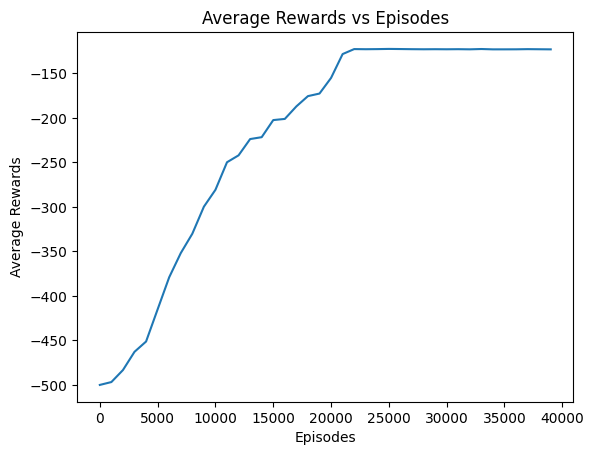

In [13]:
# Iteration 6

env = MountainCarEnv(render_mode="rgb_array")
lr = 0.2
gamma = 0.97
num_episodes = 40000
display_interval = 1000
discrete_size = [30, 30]

# Exploration settings
eps = 0.8
start_eps_decay = 1
end_eps_decay = num_episodes // 2
eps_decay_val = eps / (end_eps_decay - start_eps_decay)

q_table = np.random.uniform(low=-2, high=0, size=(discrete_size + [env.action_space.n]))

rewards, new_q_table = train_Q_car(env=env, lr=lr, gamma=gamma, num_episodes=num_episodes, display_interval=display_interval, discrete_size=discrete_size, eps=eps, q_table=q_table, iteration=6)

plt.plot(np.arange(0, num_episodes, display_interval), rewards)
plt.xlabel("Episodes")
plt.ylabel("Average Rewards")
plt.title("Average Rewards vs Episodes")
plt.show()

In [14]:
env = MountainCarEnv(render_mode="human")
test_episodes = 5
rewards = test_q_learning_agent(env, q_table, test_episodes)
print(f"Average steps per episode: {np.mean(rewards)}")

Test Episode 1
Episode 1 finished in 121 steps
Test Episode 2
Episode 2 finished in 119 steps
Test Episode 3
Episode 3 finished in 119 steps
Test Episode 4
Episode 4 finished in 121 steps
Test Episode 5
Episode 5 finished in 124 steps
Average steps per episode: 120.8
